In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand

In [6]:
def euler(ro0, V):
    n = np.size(ro0)
    for i in range(n):
        ro[i] = ro0[i] + V(ro0[i])*T/nt
    return ro

def Mro(ro,f):
    # ro = matrices de forme (n,d) contenant les coordonnées des n particules qui donne la mesure empirique
    # f fonction donnée par le problème
    # M matrice d'information
    (n1,n2) = ro.shape
    n = np.size(f(1))
    M = np.zeros((n,n))
    for i in range(n1):
        X = f(ro[i])
        M = M + np.dot(X,X.T)
    M = M/n1
    invM = np.linalg.inv(M)
    return M, invM

def Vt (f , df, invM, sigma = 0):
    Vt = lambda x: 2*(x<=1.5)*(x>=0)*df(x).dot(invM).dot(f(x)) + sigma*rand.normal()
    return Vt

def flow(ro0, f, df, T, nt, sigma = 0):
    ro = ro0
    for i in range(nt):
        M, invM = Mro(ro,f)
        V = Vt(f, df, invM, sigma)
        ro = euler(ro, V)
    return ro

In [29]:
T = 10
nt = 5000
sigma = 1
f = lambda x : np.array([x ,x**2, x**3])
df = lambda x : np.array([1, 2*x, 3*x**2])
ro = np.array([np.linspace(0,1,100)]).T
M, invM = Mro(ro,f)
rof = flow(ro, f, df, T, nt, sigma)
print(rof)

[[0.341012  ]
 [0.35869181]
 [0.34518403]
 [0.34644785]
 [0.35084977]
 [0.34197192]
 [0.33799739]
 [0.34614853]
 [0.34635547]
 [0.34238792]
 [0.34692404]
 [0.33999851]
 [0.34532731]
 [0.33879395]
 [0.33926509]
 [0.34101123]
 [0.34687246]
 [0.34852315]
 [0.36014696]
 [0.34428634]
 [0.33915832]
 [0.34086052]
 [0.3447323 ]
 [0.34539909]
 [0.34301447]
 [0.34153989]
 [0.34464037]
 [0.34097961]
 [0.34587141]
 [0.3422804 ]
 [0.34402488]
 [0.33738155]
 [0.33970171]
 [0.34006394]
 [0.34942481]
 [0.3439649 ]
 [0.33833712]
 [0.33808858]
 [0.35299398]
 [0.33401965]
 [0.34416053]
 [0.34113249]
 [0.3384842 ]
 [0.34590939]
 [0.35258935]
 [0.34769797]
 [0.3480886 ]
 [0.3511966 ]
 [0.3356054 ]
 [0.34799917]
 [0.35112486]
 [0.34673176]
 [0.35873091]
 [0.89249421]
 [0.89179866]
 [0.88621093]
 [0.88888046]
 [0.87927412]
 [0.88478964]
 [0.89207951]
 [0.89260331]
 [0.9007984 ]
 [0.89415208]
 [0.89511515]
 [0.88213345]
 [0.89236872]
 [0.88548756]
 [0.90467788]
 [0.88561571]
 [0.89400575]
 [0.88838878]
 [0.88

(array([52.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15.,  9.,  4.,  1.,
         3.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([0.41093109, 0.48312277, 0.55531445, 0.62750612, 0.6996978 ,
        0.77188948, 0.84408115, 0.91627283, 0.98846451, 1.06065618,
        1.13284786, 1.20503954, 1.27723121, 1.34942289, 1.42161457,
        1.49380624, 1.56599792, 1.6381896 , 1.71038127, 1.78257295,
        1.85476463]),
 <a list of 20 Patch objects>)

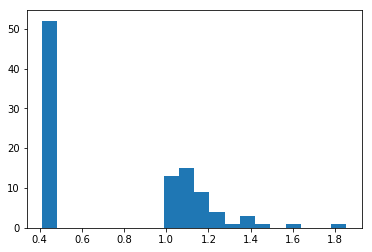

In [28]:
plt.hist(rof,bins = 20)